# Mobile Price Prediction-Binary Classification

IMPORT LIBRARY...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
dataset=pd.read_csv('datasets_train.csv')

In [5]:
dataset.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# STEP 3 : DATA PREPROCESSING

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Note:
1. No missing values
2. Categorical data already handled
3. No textual values

SEPERATING DATASET INTO FEATURE MATRIX AND VECTOR OF PREDICTION:

As mentioned above, our data have labels and we will apply supervised learning algorithms.
We define our target column as "y" and rest of the data which are used as inputs as "X".

In [7]:
X=dataset.iloc[:,0:20]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [12]:
y=dataset.iloc[:,20]
y.unique()
# We have four price ranges as target values and will do binary classification in our study.

array([1, 2, 3, 0], dtype=int64)

In [13]:
y=y.replace({0:0,1:1,2:1,3:1})
y.unique()

array([1, 0], dtype=int64)

FEATURE SCALING : 
We need to normallize and scale the data, so we'll use Standard Scaler

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
X=scaler.fit_transform(X) 

In [16]:
X=pd.DataFrame(X)

In [17]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In addition to 'data.csv' file, we have a 'test_data.csv' file, but latter one does not have target data so we do not have the chance of testing our model with it.
We split our dataset into 'training' and 'testing' datasets. And, we are going to see our models' accuracy by applying them on  test dataset.

Splitting dataset into train and test dataset in the ratio 4:1

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
# check whether the split works correctly 
print(X_train.shape)
print(X_test.shape)
# 1400 rows present in training dataset and 600 rows are present in testing dataset 

(1400, 20)
(600, 20)


Now, our data is ready to be used as a sample for predicting models.

# STEP 4 : IMPLEMENTING ML ALGORITHMS

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and testing dataset.
After that, we are going to choose the best model for our data set and create target values for test dataset.

# Logistic Regression
Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred_lr = lr.predict(X_test)

In [45]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
confusion_matrix

array([[140,   4],
       [  4, 452]], dtype=int64)

In [46]:
print("Train result:", lr.score(X_train, y_train))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lr))

print("AUC-ROC:", metrics.roc_auc_score(y_test, y_pred_lr))

Train result: 0.9921428571428571
Accuracy: 0.9866666666666667
AUC-ROC: 0.9817251461988303


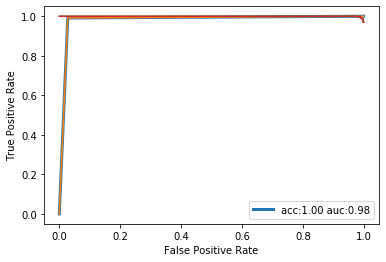

In [54]:
logistic_model_proba = LogisticRegression()

logistic_model_proba.fit(X_train, y_train)

prediction_proba = lr.predict_proba(X_test)

#the ROC-curve and PR-curve to represent our model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_lr)
acc = lr.score(X_test, y_pred_lr)
auc = metrics.roc_auc_score(y_test, y_pred_lr)
plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc), linewidth=3)
plt.legend(loc="best")

precision, recall, thresholds = metrics.precision_recall_curve(y_test, prediction_proba[:, 1])

plt.plot(fpr, tpr)

plt.plot(recall, precision)
plt.plot(recall, precision)

ValueError: x and y must be the same size

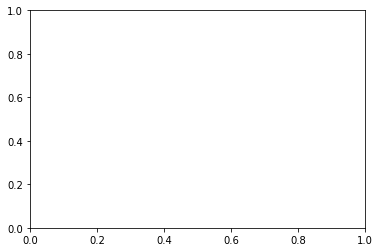

In [28]:
plt.scatter(y_pred_lr,ax[0],c="r",label="prediction")
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#-------------finding the appropriate value of k---------------
#METHOD 1------------
score=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
print(max(score))
print(score.index(max(score)))

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8) #at k=8,the value is high i.e 0.4325
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [19]:
y_pred_knn = knn.predict(X_test)

In [20]:
print(metrics.confusion_matrix(y_test, y_pred_knn))

[[55 26  9  4]
 [44 35 19  4]
 [18 42 34 26]
 [ 3 17 24 40]]


In [21]:
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
acc_knn

0.41

In [22]:
sns.countplot(y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
sns.countplot(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
#knn.score(X_test,y_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

In [ ]:
print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

In [ ]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4']))

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True)

In [ ]:
# Mobile Price Prediction

IMPORT LIBRARY...

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

dataset=pd.read_csv('datasets_train.csv')

dataset.head(5)

# STEP 3 : DATA PREPROCESSING

dataset.info()

Note:
1. No missing values
2. Categorical data already handled
3. No textual values

SEPERATING DATASET INTO FEATURE MATRIX AND VECTOR OF PREDICTION:

As mentioned above, our data have labels and we will apply supervised learning algorithms.
We define our target column as "y" and rest of the data which are used as inputs as "X".

X=dataset.iloc[:,0:20]
X.head()

y=dataset.iloc[:,20]
y.unique()
# We have four price ranges as target values and will do multi-class classification in our study.

FEATURE SCALING : 
We need to normallize and scale the data, so we'll use MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

X=min_max.fit_transform(X) 

X=pd.DataFrame(X)

X.head()

In addition to 'data.csv' file, we have a 'test_data.csv' file, but latter one does not have target data so we do not have the chance of testing our model with it.
We split our dataset into 'training' and 'testing' datasets. And, we are going to see our models' accuracy by applying them on  test dataset.

Splitting dataset into train and test dataset in the ratio 4:1

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# check whether the split works correctly 
print(X_train.shape)
print(X_test.shape)

Now, our data is ready to be used as a sample for predicting models.

# STEP 4 : IMPLEMENTING ML ALGORITHMS

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and testing dataset.
After that, we are going to choose the best model for our data set and create target values for test dataset.

# Logistic Regression
Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
confusion_matrix

print("Train result:", lr.score(X_train, y_train))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lr))

print("AUC-ROC:", metrics.roc_auc_score(y_test, y_pred_lr,multi_class="ovo"))

ax=y_pred_lr.shape
ax



plt.scatter(y_pred_lr,ax[0],c="r",label="prediction")
plt.show()

# KNN

from sklearn.neighbors import KNeighborsClassifier
#-------------finding the appropriate value of k---------------
#METHOD 1------------
score=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
print(max(score))
print(score.index(max(score)))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8) #at k=8,the value is high i.e 0.4325
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred_knn))

acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
acc_knn

sns.countplot(y_pred)

sns.countplot(y_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
#knn.score(X_test,y_test)

from sklearn.metrics import precision_score,recall_score,f1_score

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4']))

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True)





